In [ ]:
#Problem Statement
#Predicting the sentiment using IMDB movie ratings data to classify their sentiment as positive or negative.

In [ ]:
#setting the path

In [1]:
pwd


'C:\\Users\\Vipparthy Niharika'

In [2]:
cd D:\College\Project SA\data sets\IMDB dataset

D:\College\Project SA\data sets\IMDB dataset


In [ ]:
#Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import pickle

In [4]:
#Loding data set here dataset size is 50000 reviews
 #0 is positive
 #1 is negetive   

In [5]:
df=pd.read_csv('imdbdataset.csv')
df.head(10)

,review,sentiment
0,- A film crew is shooting a horror movie in an...,1
1,- A group of bandits rob a train of the gold s...,0
2,- A Mexican priest becomes a wrestler to save ...,1
3,- A newlywed couple move into the home of the ...,1
4,- A small time hood tricks the local mob boss ...,1
5,- After their sons are sentenced to life in pr...,0
6,- Bad Stuff: This movie is real crap. Bad stun...,1
7,"- Contains 1 spoiler, market with: ***** -<br ...",1
8,- Contains miner spoilers - <br /><br />I have...,1
9,- Having grown tired of the rat race and cramp...,0


In [6]:
df.sentiment.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [7]:
values=df.sentiment.value_counts()

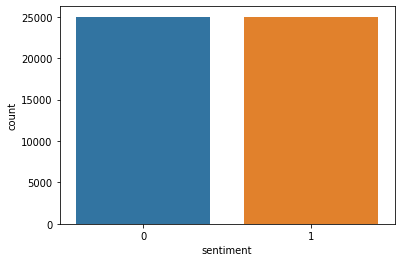

In [8]:
sns.countplot(df.sentiment)

In [ ]:
#Data Preparation

In [9]:
df.loc[0,'review'][-80:]

"rsement). Overall though, these moments aren't enough to make this a good movie."

In [10]:
#import re
def preprocessor(text):
    text=re.sub('[\W]',' ',text.lower())
    return text

In [11]:
preprocessor(df.loc[0,'review'][-80:])

'rsement   overall though  these moments aren t enough to make this a good movie '

In [12]:
df['review']=df['review'].apply(preprocessor)
df.head(10)

,review,sentiment
0,a film crew is shooting a horror movie in an...,1
1,a group of bandits rob a train of the gold s...,0
2,a mexican priest becomes a wrestler to save ...,1
3,a newlywed couple move into the home of the ...,1
4,a small time hood tricks the local mob boss ...,1
5,after their sons are sentenced to life in pr...,0
6,bad stuff this movie is real crap bad stun...,1
7,contains 1 spoiler market with br ...,1
8,contains miner spoilers br br i have...,1
9,having grown tired of the rat race and cramp...,0


In [ ]:
#tokenizing removing stopwords and stemming
  # stopwords are words like [a, an ,the ,is ,are...etc] that are not useful for the prediction

In [13]:
#import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
porter= PorterStemmer()
def clean(text):
    stopwords=nltk.corpus.stopwords.words('english')
    s=['br','films','actors','actress','movies','times','characters','scenes','people','performances','performs','action','roles','direct','to','do',
      'two','it','my','on','hm','hmm','or','seem','be','as','of','goes','way','or','watches','see','make','made','stories','show','one','first','tries',
      'little','products','directors','actor','movie','character','lot','got','us','film','go','watch','look','even','end','think']
    stopwords.extend(s)
    tidy=word_tokenize(text)  
    tidy_wosw=[word for word in tidy if not word in stopwords] 
    se=[]
    for i in tidy_wosw:
        se.append(porter.stem(i))
        se.append(" ")
    return "".join(se)

In [14]:
df['review']=df['review'].apply(clean)
df.head(10)

,review,sentiment
0,crew shoot horror old supposedli curs hous yea...,1
1,group bandit rob train gold shipment carri esc...,0
2,mexican priest becom wrestler save orphanag so...,1
3,newlyw coupl move home husband dead former wif...,1
4,small time hood trick local mob boss money cou...,1
5,son sentenc life prison adel debbi reynold hel...,0
6,bad stuff real crap bad stunt thing look fake ...,1
7,contain 1 spoiler market present yet anoth rem...,1
8,contain miner spoiler seen number decent indi ...,1
9,grown tire rat race cramp live condit new york...,0


In [ ]:
#Transform Text Data into TF-IDF Vectors 

In [15]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
    #str(text)
    return text.split()
def tokenizer_porter(text):
    return[porter.stem(word) for word in text.split()]

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents=None,
                       lowercase=False,
                       preprocessor=None,
                       tokenizer=tokenizer_porter,
                       use_idf=True,
                       norm='l2',
                       smooth_idf=True)
y=df.sentiment.values
X=tfidf.fit_transform(df.review)

In [17]:
#Document Classification using Logistic Regression

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5,shuffle=False)

In [19]:
import pickle
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv= 5,
                          scoring= 'accuracy',
                          random_state= 0,
                          n_jobs= -1,
                          verbose= 3,
                          max_iter= 300).fit(X_train, y_train)
model_50k = open('model_50k.sav','wb')
pickle.dump(clf, model_50k)
model_50k.close()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.9min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished


In [ ]:
#Model Evaluation

In [20]:
filename='model_50k.sav'
model_clf = pickle.load(open(filename, 'rb'))

In [21]:
model_clf.score(X_test, y_test)

0.8906

In [ ]:
#Testing Prediction

In [40]:
new = np.array(['I like ancient wisdom.'])

In [41]:
ynew=model_clf.predict(tfidf.transform(new))

In [42]:
print(ynew)

[0]


In [22]:
import numpy as np
X_pnew=np.array(['Oh!Hello This is a beautiful day!'])

In [23]:
X_pnew

array(['Oh!Hello This is a beautiful day!'], dtype='<U33')

In [24]:
y_pnew=model_clf.predict(tfidf.transform(X_pnew))

In [25]:
print(y_pnew)

[0]


In [26]:
X_nnew=np.array(['we are bad'])

In [27]:
X_nnew

array(['we are bad'], dtype='<U10')

In [28]:
y_nnew=model_clf.predict(tfidf.transform(X_nnew))

In [29]:
print(y_nnew)

[1]


In [30]:
new=pd.read_csv('newdata.csv')
new.head()

,review,sentiment
0,It's a very good day.,NaN
1,"#This is so boring, I hate it.",NaN


In [31]:
new['review']=new['review'].apply(preprocessor)
new['review']=new['review'].apply(clean)

In [32]:
new.sentiment=model_clf.predict(tfidf.transform(new.review))
new.head()

,review,sentiment
0,good day,0
1,bore hate,1


In [ ]:
#Data Visualization

In [33]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [34]:
all_words_positive = ' '.join(text for text in df['review'][df['sentiment']==0])

In [35]:
import numpy as np
Mask = np.array(Image.open(requests.get('http://clipart-library.com/2020/kissclipart-spiderman-cut-out-clipart-ultimate-spider-man-stan-c8051244a44e8492.jpg', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='white', height=1500, width=4000,mask=Mask).generate(all_words_positive)

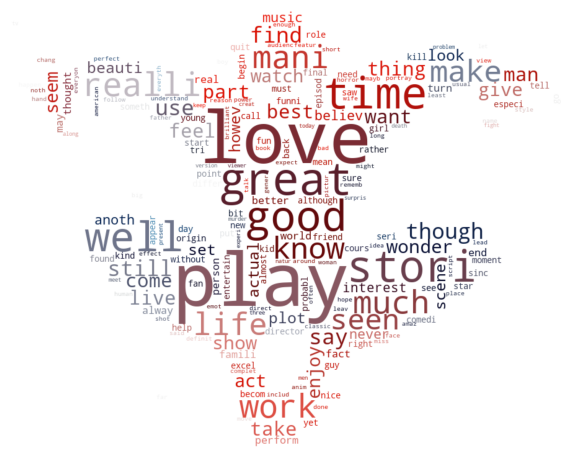

In [36]:
# Size of the image generated 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [37]:
all_words_negative = ' '.join(text for text in df['review'][df['sentiment']==1])

In [38]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/img/1364954.jpg', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

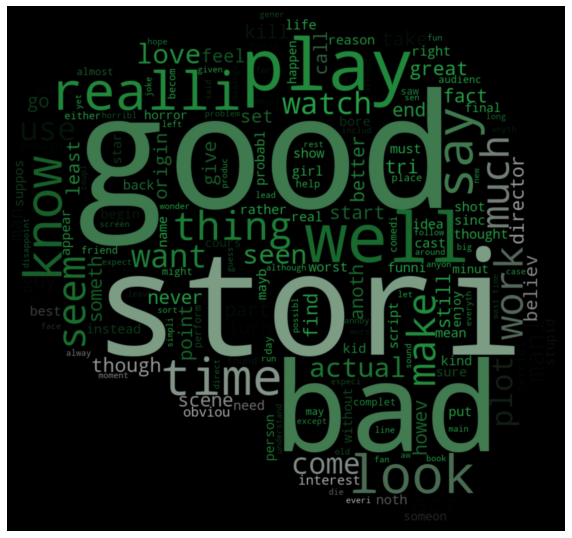

In [39]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()